To clean the provided data, 

1. Check for Missing Values: Examine each column and identify any missing values. Determine the appropriate strategy for handling missing values based on the context of the data. For example, you can choose to drop rows with missing values or fill them with appropriate values based on the column type.

2. Remove Irrelevant Columns: If any columns are not relevant for your analysis or visualization, you can drop them from the DataFrame. In this case, you may consider removing the columns like "INCIDENT_NUMBER," "REPORTING_AREA," "SHOOTING," and "Location" if they are not needed.

3. Rename Columns: If necessary, rename columns to ensure clarity and consistency. You can use the `rename` method in pandas to rename columns.

4. Convert Data Types: Check the data types of each column and convert them as needed. For example, you may want to convert the "OCCURRED_ON_DATE" column to a datetime format using the `to_datetime` function.

5. Handle Inconsistent Entries: Check for inconsistent entries within columns. For example, check if there are any duplicate entries or inconsistent naming conventions in the "OFFENSE_CODE_GROUP" or "OFFENSE_DESCRIPTION" columns. If necessary, clean and standardize the entries.

6. Handle Outliers: Examine numerical columns like "Lat" and "Long" for outliers or erroneous data points. Remove or correct any outliers that may affect the accuracy of your analysis or visualization.

Regarding the visualizations you can generate from the data, here are some possibilities:

- Time Series Analysis: Visualize the crime trends over time by plotting the number of incidents against the "YEAR," "MONTH," or "DAY_OF_WEEK" columns. This can help identify any patterns or changes in crime rates over the years.

- Crime Distribution by District: Plot a bar chart or a pie chart to visualize the distribution of crimes across different districts ("DISTRICT" column).

- Geospatial Visualization: Create a geospatial map of crime incidents using the latitude ("Lat") and longitude ("Long") columns. This can help identify high-crime areas or hotspots in Boston.

- Crime by Offense Group: Generate a bar chart or a pie chart to show the distribution of crimes based on the "OFFENSE_CODE_GROUP" column. This can provide insights into the types of crimes that are most prevalent.

- Hourly Crime Analysis: Visualize the distribution of crimes by hour of the day using a line chart or a bar chart. This can help identify the peak hours for criminal activities.



In [39]:
#Importing all modules required for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import seaborn as sns
import folium

In [40]:
data=pd.read_csv("boston_crime_2018.csv")

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98888 entries, 0 to 98887
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      98888 non-null  object 
 1   OFFENSE_CODE         98888 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null  object 
 3   OFFENSE_DESCRIPTION  98888 non-null  object 
 4   DISTRICT             98206 non-null  object 
 5   REPORTING_AREA       98888 non-null  object 
 6   SHOOTING             402 non-null    object 
 7   OCCURRED_ON_DATE     98888 non-null  object 
 8   YEAR                 98888 non-null  int64  
 9   MONTH                98888 non-null  int64  
 10  DAY_OF_WEEK          98888 non-null  object 
 11  HOUR                 98888 non-null  int64  
 12  UCR_PART             98868 non-null  object 
 13  STREET               97274 non-null  object 
 14  Lat                  92133 non-null  float64
 15  Long                 92133 non-null 

In [42]:
data.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                 682
REPORTING_AREA             0
SHOOTING               98486
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  20
STREET                  1614
Lat                     6755
Long                    6755
Location                6755
dtype: int64

In [43]:
#Removing unwanted columns
data = data.drop(["INCIDENT_NUMBER","OFFENSE_CODE","OFFENSE_DESCRIPTION","REPORTING_AREA"], axis=1)
data=data.rename(columns={"OFFENSE_CODE_GROUP":"OFFENCE TYPE"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98888 entries, 0 to 98887
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OFFENCE TYPE      98888 non-null  object 
 1   DISTRICT          98206 non-null  object 
 2   SHOOTING          402 non-null    object 
 3   OCCURRED_ON_DATE  98888 non-null  object 
 4   YEAR              98888 non-null  int64  
 5   MONTH             98888 non-null  int64  
 6   DAY_OF_WEEK       98888 non-null  object 
 7   HOUR              98888 non-null  int64  
 8   UCR_PART          98868 non-null  object 
 9   STREET            97274 non-null  object 
 10  Lat               92133 non-null  float64
 11  Long              92133 non-null  float64
 12  Location          92133 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 9.8+ MB


In [44]:
data["SHOOTING"].fillna("N", inplace=True)
data.isnull().sum()

OFFENCE TYPE           0
DISTRICT             682
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART              20
STREET              1614
Lat                 6755
Long                6755
Location            6755
dtype: int64

In [45]:
#As there are only 20 values as nulls in UCR_PART column, we can remove those nulls
data = data.dropna(subset=["UCR_PART","STREET", "DISTRICT","Lat", "Long", "Location"])
data.isnull().sum()

OFFENCE TYPE        0
DISTRICT            0
SHOOTING            0
OCCURRED_ON_DATE    0
YEAR                0
MONTH               0
DAY_OF_WEEK         0
HOUR                0
UCR_PART            0
STREET              0
Lat                 0
Long                0
Location            0
dtype: int64

In [46]:
data['SHOOTING'] = data['SHOOTING'].replace({'Y': 1, 'N': 0})
data.info()
data['SHOOTING'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91472 entries, 0 to 98887
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OFFENCE TYPE      91472 non-null  object 
 1   DISTRICT          91472 non-null  object 
 2   SHOOTING          91472 non-null  int64  
 3   OCCURRED_ON_DATE  91472 non-null  object 
 4   YEAR              91472 non-null  int64  
 5   MONTH             91472 non-null  int64  
 6   DAY_OF_WEEK       91472 non-null  object 
 7   HOUR              91472 non-null  int64  
 8   UCR_PART          91472 non-null  object 
 9   STREET            91472 non-null  object 
 10  Lat               91472 non-null  float64
 11  Long              91472 non-null  float64
 12  Location          91472 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 9.8+ MB


array([0, 1], dtype=int64)

In [47]:
def map_district_to_area(code):
    #created the below dictionary from internet.
    boston_areas = {
    "B2": "Back Bay",
    "D14": "Downtown",
    "C11": "Chinatown",
    "D4": "South End",
    "B3": "Beacon Hill",
    "C6": "North End",
    "A1": "Financial District",
    "A15": "Roxbury",
    "E13": "Jamaica Plain",
    "E18": "Brookline",
    "E5": "Fenway",
    "A7": "Allston"
    }
    return boston_areas.get(code)

#creating a district name column for better understanding the areas
data['BOSTON_AREA'] = data['DISTRICT'].apply(map_district_to_area)


In [48]:
data=data.drop("DISTRICT",axis=1)

In [49]:

data.reset_index(drop=True, inplace=True)

# Convert the "OCCURRED_ON_DATE" column to a timestamp
data["OCCURRED_ON_DATE"] = pd.to_datetime(data["OCCURRED_ON_DATE"]).dt.date

# Check the updated data types
data.head()


,OFFENCE TYPE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,BOSTON_AREA
0,Harassment,0,2018-01-01,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)",Back Bay
1,Fraud,0,2018-01-01,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)",Downtown
2,Other,0,2018-01-01,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)",Chinatown
3,Property Lost,0,2018-01-01,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",South End
4,Larceny,0,2018-01-01,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)",Chinatown


Distribution of Crimes in Boston in the year 2018

In [50]:
#cleaning part one two three in ucr_part column

data["UCR_PART"]=data["UCR_PART"].replace({'Part One': 1, 'Part Two': 2, 'Part Three':3})
data["UCR_PART"].unique()

array([2, 3, 1, 'Other'], dtype=object)

Back Bay              14459
Chinatown             12434
South End             11224
Beacon Hill           11002
Financial District     9631
North End              6955
Downtown               5817
Brookline              5269
Jamaica Plain          5188
Fenway                 3954
Allston                3626
Roxbury                1913
Name: BOSTON_AREA, dtype: int64
<class 'pandas.core.series.Series'>


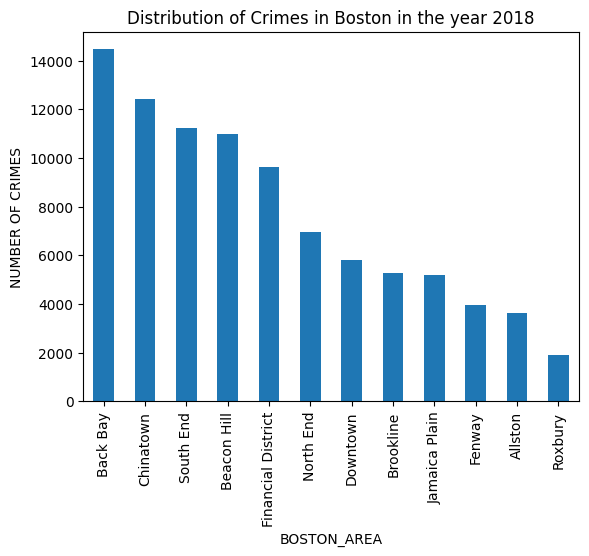

In [51]:
#Plotting the bar graph, which is grouped by boston area
area_counts = data['BOSTON_AREA'].value_counts()
print(area_counts)
print(type(area_counts))
# Plot the bar graph
area_counts.plot(kind='bar')

# Customize the plot
plt.xlabel('BOSTON_AREA')
plt.ylabel('NUMBER OF CRIMES')
plt.title('Distribution of Crimes in Boston in the year 2018')

# Display the plot
plt.show()


Distribution of type of Crimes in Boston in the year 2018

In [52]:

# top_areas = data['BOSTON_AREA'].value_counts().nlargest(15).index

# # Filter the data for the top areas
# top_areas_data = data[data['BOSTON_AREA'].isin(top_areas)]
# major_crimes = top_areas_data.groupby(['BOSTON_AREA', 'OFFENCE TYPE']).size().reset_index(name='COUNT')

# # Get the major crime reported in each of the top areas
# # major_crimes = major_crimes.groupby('BOSTON_AREA')['COUNT'].idxmax()
# # major_crimes = major_crimes.map(lambda x: major_crimes.loc[x, 'OFFENCE TYPE'])
# idx = major_crimes.groupby('BOSTON_AREA')['COUNT'].idxmax()
# major_crimes = major_crimes.loc[idx]
# major_crimes = major_crimes.set_index('BOSTON_AREA')['OFFENCE TYPE']
# print(major_crimes)
# # Customize the plot
# plt.xlabel('BOSTON_AREA')
# plt.ylabel('Major Crime Reported')
# plt.title('Top 15 Areas with Reported Crimes and Major Crimes')

# # Display the plot
# plt.show()


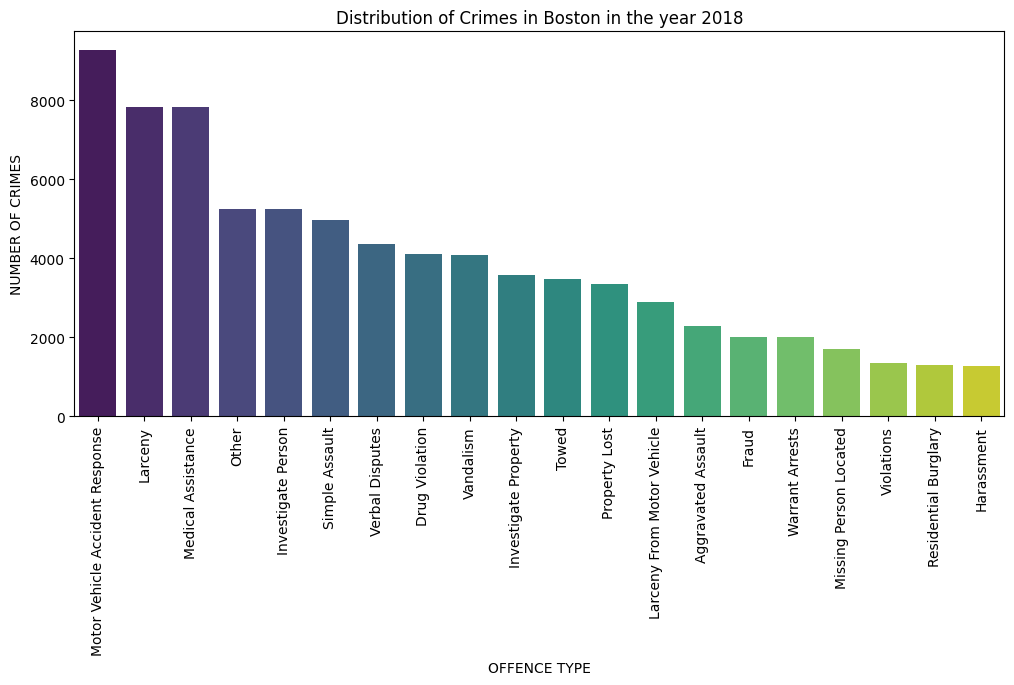

In [53]:
#Plotting the bar graph, which is grouped by boston area
area_counts = data['OFFENCE TYPE'].value_counts().head(n=20)

# Plot the bar graph
plt.figure(figsize=(12,5))
#area_counts.plot(kind='bar', cmap='viridis')
sns.barplot(x=area_counts.index, y=area_counts.values, palette='viridis')
#plt.plot(x='OFFENCE TYPE', data=area_counts)
# Customize the plot
plt.xlabel('OFFENCE TYPE')
plt.ylabel('NUMBER OF CRIMES')
plt.title('Distribution of Crimes in Boston in the year 2018')
plt.xticks(rotation=90)
# Display the plot
plt.show()

In [54]:
daily_crime_counts = data.groupby(['OCCURRED_ON_DATE', 'BOSTON_AREA']).size().reset_index(name='Crime Count')

daily_crime_counts = daily_crime_counts[['OCCURRED_ON_DATE', 'BOSTON_AREA', 'Crime Count']]



 Hourly Crime Analysis: Visualize the distribution of crimes by hour of the day using a line chart or a bar chart. This can help identify the peak hours for criminal activities.

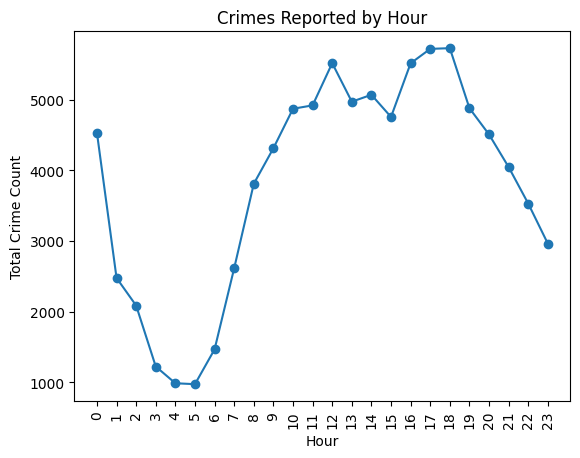

In [55]:
# Group the data by the hour and calculate the total crime count for each hour
hourly_crime_counts = data.groupby('HOUR')['OFFENCE TYPE'].count()

# Create the line chart
plt.plot(hourly_crime_counts.index, hourly_crime_counts.values, marker='o')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Total Crime Count')
plt.title('Crimes Reported by Hour')

# Set the x-axis ticks and labels
plt.xticks(range(24), rotation=90)

# Show the plot
plt.show()


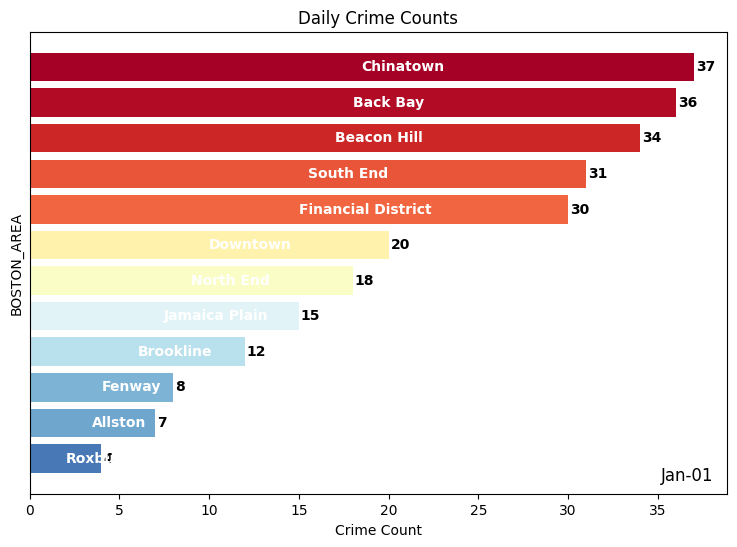

In [56]:

from datetime import datetime
from datetime import date as dt_date
def update(date):
    # Filters dataframe to rows at the date
    data = daily_crime_counts[daily_crime_counts['OCCURRED_ON_DATE'] == date]

    # Sort data in descending order by 'Crime Count'
    data = data.sort_values(by='Crime Count', ascending=True)

    # Assigns filtered data to x,y variables
    x = data['Crime Count']
    y = data['BOSTON_AREA']

    # Clear the previous plot
    plt.cla()

    # Plot horizontal bar chart
    colors = cm.RdYlBu_r(x / float(max(x)))
    plt.barh(y, x, color=colors)

    # Set labels and title
    plt.xlabel('Crime Count')
    plt.ylabel('BOSTON_AREA')
    plt.title('Daily Crime Counts')

    #date = datetime.strptime(date, '%Y-%m-%d').strftime('%b-%d')
    if isinstance(date, dt_date):
        # Format date as string
        date = date.strftime('%b-%d')
    else:
        # Convert date to datetime object and format as string
        date = datetime.strptime(date, '%Y-%m-%d').strftime('%b-%d')

    # Display date as annotation on the plot
    plt.annotate(date, (0.98, 0.02), xycoords='axes fraction',
                 ha='right', va='bottom', fontsize=12)

    # Display x label over the bar and crime count at the edge of each bar
    for i, v in enumerate(x):
        plt.text(v + 0.1, i - 0.1, str(v), color='black', fontweight='bold')
        plt.text(v / 2, i - 0.1, y.iloc[i], color='white', fontweight='bold')

    # Update the y-axis ticks and labels
    plt.yticks([])
    #plt.yticks(range(len(y)), y)

# Create a unique list of dates
date_list = daily_crime_counts['OCCURRED_ON_DATE'].unique()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(9, 6))

# Set the axis limits
ax.set_xlim(0, daily_crime_counts['Crime Count'].max() + 1)
ax.set_ylim(0, len(daily_crime_counts['BOSTON_AREA'].unique()))

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=date_list, interval=350, repeat=True)

# Save the animation as a GIF
anim.save('myanim.gif', writer='pillow')



In [57]:


# Create a map centered around Boston
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Iterate over the crime incidents data
for index, row in data.iterrows():
    # Add a marker for each crime incident
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['OFFENCE TYPE'],
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# Display the map
m


KeyboardInterrupt: 

In [62]:
# Create a map centered at the mean latitude and longitude of the data
data['Crime Count'] = data.groupby('OCCURRED_ON_DATE')['OCCURRED_ON_DATE'].transform('count')


m = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], zoom_start=12)

# # Add a bubble map layer to the map
# for i, row in data.iterrows():
#     folium.Circle(
#         location=[row['Lat'], row['Long']],
#         radius=row['Crime Count'] * 10,
#         color='red',
#         fill=True,
#         fill_color='red'
#     ).add_to(m)

# # Display the map
# m


# m = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], zoom_start=12)

# Add a heatmap layer to the map
from folium.plugins import HeatMap
heatmap_data = data[['Lat', 'Long', 'Crime Count']].groupby(['Lat', 'Long']).sum().reset_index().values.tolist()
HeatMap(data=heatmap_data, radius=10).add_to(m)

# Display the map
m